#  Tráfego da I-94

O objetivo desse projeto é determinar alguns indicadores (clima, hora,etc) de tráfego da I-94. Podemos através dessa análise descobrir, por exemplo, quando o tráfego costuma ser mais intenso.

Você pode baixar os dados de [ UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Os dados tem 48.204 linhas e 9 colunas e não há valores nulos. 
Temos dados de 2012-10-02 09:00:00 até 2018-09-30 23:00:00.

Devemos evitar generalizar nossos resultados para toda a rodovia I-94.

## Analisando o Volume de Tráfego

Vamos começar nossa análise examinando a coluna `traffic_volume`.


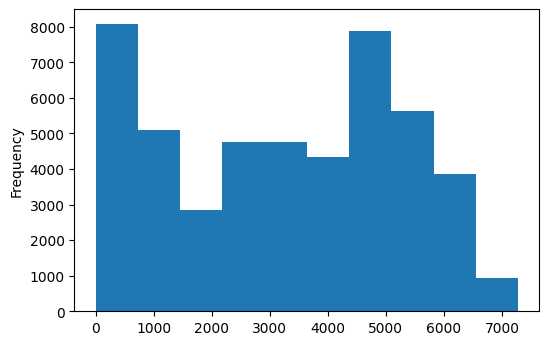

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Entre 2012-10-02 09:00:00 e 2018-09-30 23:00:00, o volume de tráfego variou de 0 a 7.280 carros, com média de 3.260 carros.

Cerca de 25% das vezes, havia apenas 1.193 carros ou menos passando pela estação a cada hora – isso provavelmente ocorre durante a noite ou quando uma estrada está em construção. No entanto, cerca de 25% das vezes, o volume de tráfego foi quatro vezes maior (4.933 carros ou mais).

Podemos então tentar comparar dados diurnos com dados noturnos.

## Volume de tráfego: Dia x Noite

Suponha que:

* Dia: das 7h às 19h (12 horas)
* Noite: das 19h às 7h (12 horas)

In [6]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

dia = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(dia.shape)

noite = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(noite.shape)

(23877, 9)
(24327, 9)


Essa diferença nos números de linhas entre o dia e a noite existe devido a alguns dados ausentes. Por exemplo, se você observar as linhas 176 e 177 (i_94.iloc[176:178]),verá que não há dados por duas horas (4 e 5).

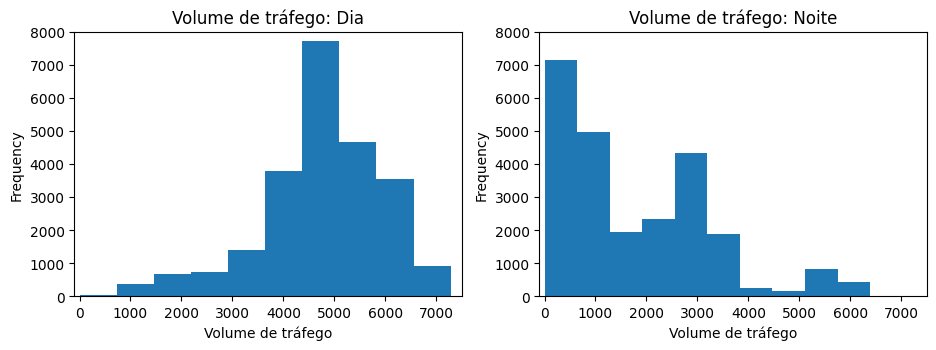

In [7]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(dia['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Volume de tráfego: Dia')
plt.ylabel('Frequency')
plt.xlabel('Volume de tráfego')

plt.subplot(1, 2, 2)
plt.hist(noite['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Volume de tráfego: Noite')
plt.ylabel('Frequency')
plt.xlabel('Volume de tráfego')

plt.show()

In [8]:
dia['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
noite['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

O gráfico que mostra o volume de tráfego durante o dia fica distorcido. Isso significa que a maioria dos valores de volume de tráfego são altos – há 4.252 ou mais carros passando pela estação a cada hora 75% do tempo.

O gráfico que exibe os dados noturnos está inclinado à direita. Isso significa que a maioria dos valores de volume de tráfego são baixos – em 75% das vezes, o número de carros que passavam pela estação a cada hora era inferior a 2.819.

Vemos então que o tráfego à noite é geralmente leve. Nosso objetivo é encontrar tráfego intenso, então vamos nos concentrar apenas nos dados diurnos daqui para frente.

## Tempo

Um dos possíveis indicadores de tráfego intenso é o tempo. Pode haver mais pessoas na estrada em um determinado mês, em um determinado dia ou em uma determinada hora do dia.

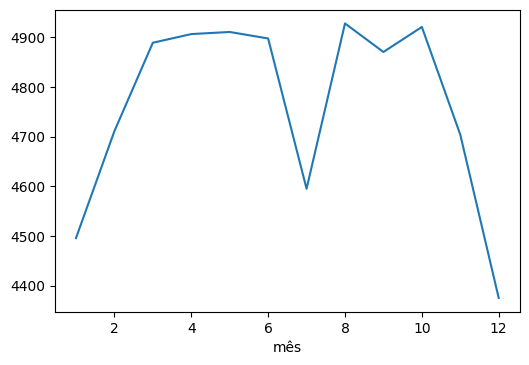

In [10]:
dia['mês'] = dia['date_time'].dt.month
by_month = dia.groupby('mês').mean()
by_month['traffic_volume'].plot.line()
plt.show()

O tráfego parece menos intenso durante os meses de novembro a fevereiro e mais intenso durante os meses de março a outubro, com uma exceção interessante: julho.

Vamos ver como o volume de tráfego mudou a cada ano em julho.

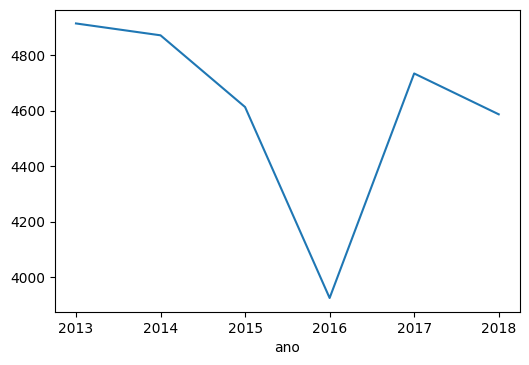

In [11]:
dia['ano'] = dia['date_time'].dt.year
only_july = dia[dia['mês'] == 7]
only_july.groupby('ano').mean()['traffic_volume'].plot.line()
plt.show()

Normalmente, o tráfego é bastante intenso em julho, semelhante aos outros meses.
A única exceção que vemos é 2016, que teve uma grande queda no volume de tráfego.
Podemos dizer que os meses de março a outubro geralmente apresentam tráfego mais pesado em comparação com novembro a fevereiro .
De março a outubro, você pode esperar para cada hora do dia um volume de tráfego próximo a 5.000 carros.


#### Dia

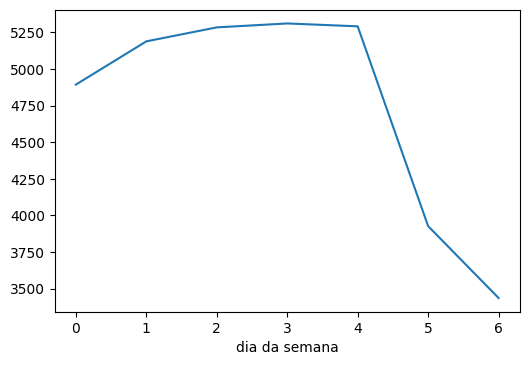

In [12]:
dia['dia da semana'] = dia['date_time'].dt.dayofweek
by_dayofweek = dia.groupby('dia da semana').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

O volume de tráfego é significativamente maior em dias úteis (segunda a sexta). Com exceção de segunda-feira, só vemos valores acima de 5.000 em dias úteis. O trânsito é mais leve nos finais de semana, com valores abaixo de 4.000 carros.

Vamos agora ver quais valores temos com base na hora do dia. Os fins de semana abaixarão as médias, então vamos olhar para elas separadamente.

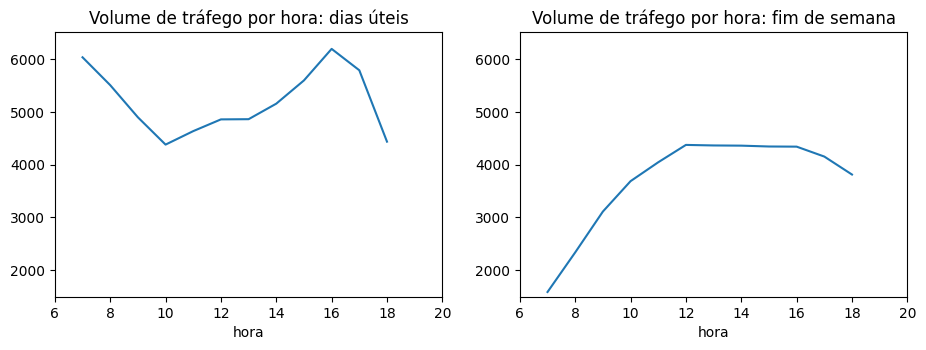

In [13]:
dia['hora'] = dia['date_time'].dt.hour
bussiness_days = dia.copy()[dia['dia da semana'] <= 4] 
weekend = dia.copy()[dia['dia da semana'] >= 5] 
by_hour_business = bussiness_days.groupby('hora').mean()
by_hour_weekend = weekend.groupby('hora').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Volume de tráfego por hora: dias úteis')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Volume de tráfego por hora: fim de semana')

plt.show()

O volume de tráfego é geralmente maior durante os dias úteis em comparação aos finais de semana.

Podemos observar que:
* O tráfego é geralmente mais intenso durante os de março a outubro em comparação com os meses de novembro a fevereiro, e costuma ser mais intenso em dias úteis em comparação aos finais de semana.

* Nos dias úteis, o harário de pico é por volta das 7 e 16.

## Clima

Outro possível causador de tráfego intenso é o clima. Os dados contém algumas colunas úteis sobre clima: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

Algumas dessas colunas são numéricas, então vamos começar procurando seus valores correlacionados com `traffic_volume`.

In [14]:
dia.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
mês              -0.022337
ano              -0.003557
dia da semana    -0.416453
hora              0.172704
Name: traffic_volume, dtype: float64

A relação mais forte é com apenas +0,13. As outras colunas relevantes não mostram nenhuma correlação forte com `traffic_value`.

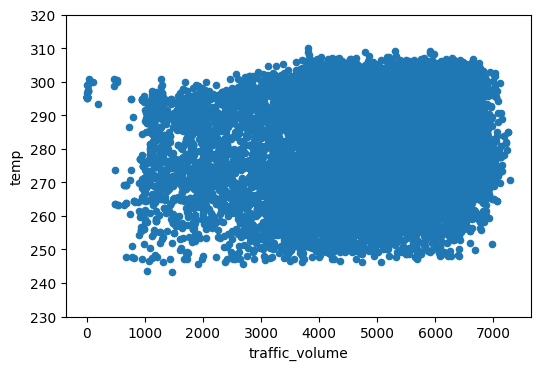

In [17]:
dia.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) 
plt.show()

Podemos concluir que a temperatura não é um indicador concreto de tráfego intenso.

Vamos analisar agora as outras colunas relacionadas ao clima: `weather_main` e `weather_description`.

### Tipos de Clima

Vamos agrupar os dados do `weather_main` e observar as médias do `traffic_volume`.

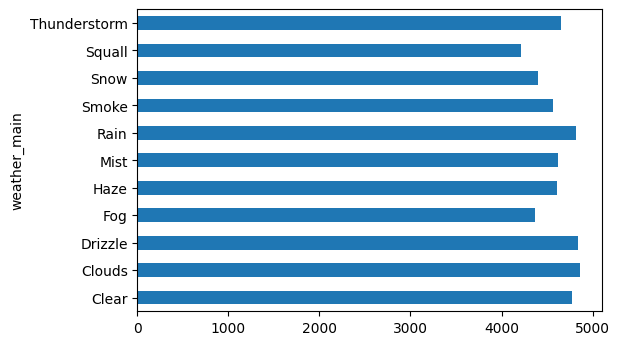

In [21]:
climas = dia.groupby('weather_main').mean()
climas['traffic_volume'].plot.barh()
plt.show()

Não há nenhum tipo de clima em que o volume de tráfego exceda 5.000 carros. :(

Vamos então agrupar `weather_description`:

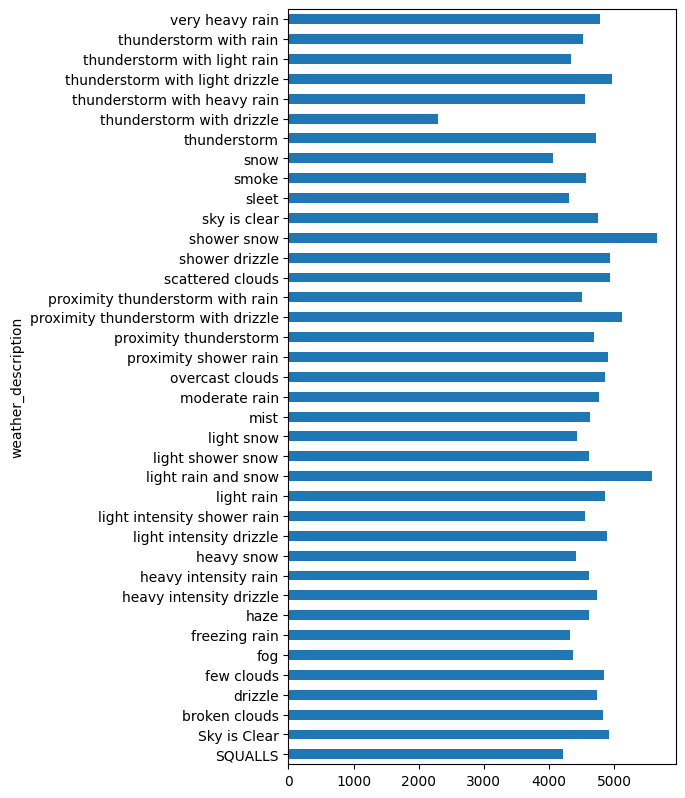

In [25]:
climasd = dia.groupby('weather_description').mean()
climasd['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

Existem então três tipos de clima em que o volume de tráfego excede 5.000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

Não está claro por que esses climas têm os valores médios de tráfego mais altos - esse é um clima ruim, mas não tão ruim assim. Talvez mais pessoas saem de carro quando o tempo está ruim em vez de andar de bicicleta ou caminhar.

## Considerações Finais

Neste projeto, tentamos encontrar alguns indicadores de tráfego intenso na rodovia interestadual I-94. Conseguimos encontrar dois tipos de indicadores:

* Indicadores de tempo
    * O tráfego é geralmente mais intenso durante os de março a outubro em comparação com os meses de novembro a fevereiro e costuma ser mais intenso em dias úteis em comparação aos finais de semana.
    * Nos dias úteis, o horário de pico é por volta das 7 e 16.
* Indicadores climáticos
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle
